In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import MICCF 

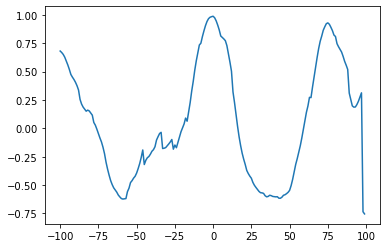

In [6]:
lc_r_file = scipy.io.readsav('./lcs_2017_r.sav')
lc_r = lc_r_file["lcs_2017"]

lc_k_file = scipy.io.readsav('./lcs_2017_k.sav')
lc_k = lc_k_file["lcs_2017"]

f1_flux = [np.power(10., ((lc_r.mag[0][i])*(-0.4)))*3631. for i in range(len(lc_r.mag[0]))]
f1_jd = lc_r.jd[0]

f2_flux = [np.power(10., ((lc_k.mag[0][i])*(-0.4)))*3631. for i in range(len(lc_k.mag[0]))]
f2_jd = lc_k.jd[0]

f1_int_jd = [i for i in range(round(min(f1_jd)), round(max(f1_jd)),1)]
f1_int_flux = np.interp(f1_int_jd, f1_jd, f1_flux)

test_lags = range(-100,100)
ccf = MICCF.M_ICCF(f1_int_jd, f1_int_flux, f2_jd, f2_flux, test_lags)

plt.plot(test_lags, ccf)